# Customer Churn Prediction
<img src="https://media.giphy.com/media/jpoDZOyEg38F4cFFMi/giphy.gif" width=300>


<br>

Problem Statement & Dataset : https://www.kaggle.com/shrutimechlearn/churn-modelling

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Churn_Modelling.csv")

In [3]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Surname : The surname of the customer

CreditScore : The credit score of the customer

Geography : The country of the customer(Germany/France/Spain)

Gender : The gender of the customer (Female/Male)

Age : The age of the customer

Tenure : The customer's number of years in the in the bank

Balance : The customer's account balance

NumOfProducts : The number of bank products that the customer uses

HasCrCard : Does the customer has a card? (0=No,1=Yes)

IsActiveMember : Does the customer has an active mebership (0=No,
1=Yes)

EstimatedSalary : The estimated salary of the customer

Exited : Churned or not? (0=No,1=Yes)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Exploratory Data Analysis
<img src="https://media.giphy.com/media/GFE5dagX3tKTqkRZg8/giphy.gif
" width=300>


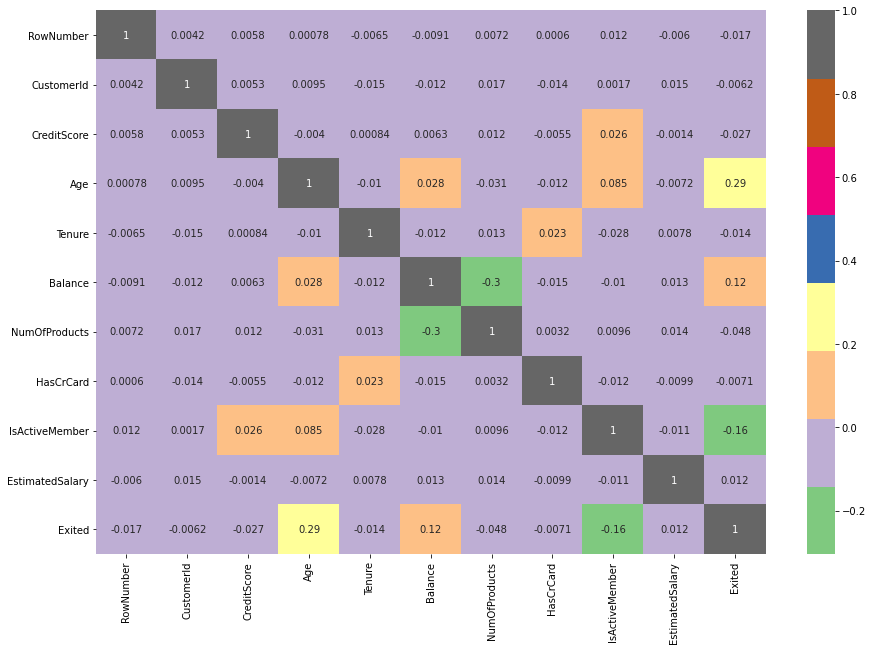

In [11]:
plt.figure(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr, annot = True, cmap="Accent")

In [17]:
features = corr['Exited'].sort_values(ascending=False)[1:]

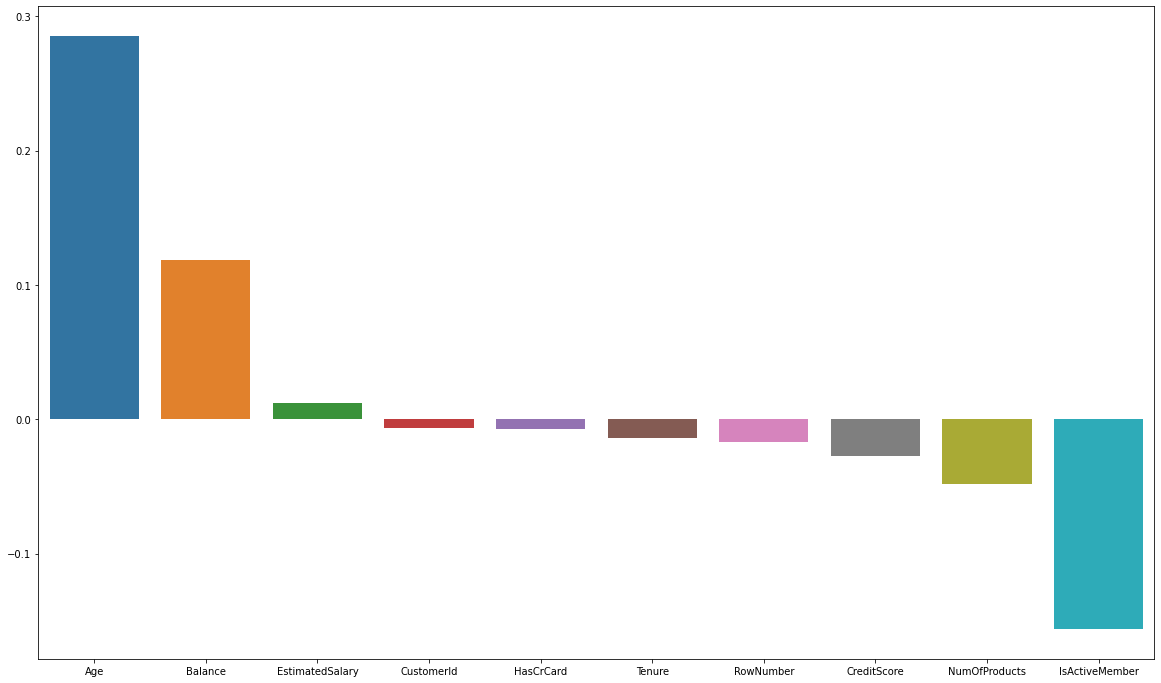

In [21]:
plt.figure(figsize=(20,12))
sns.barplot(x = features.index, y =features.values)
plt.show()

# Data Visualization

In [22]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


0    7963
1    2037
Name: Exited, dtype: int64


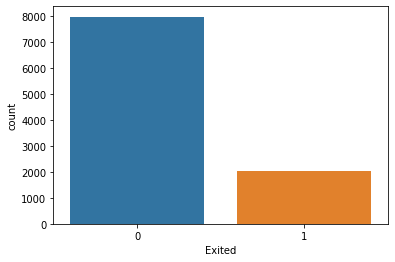

In [25]:
print(df['Exited'].value_counts())

sns.countplot(x='Exited', data = df)
plt.show()

Male      5457
Female    4543
Name: Gender, dtype: int64


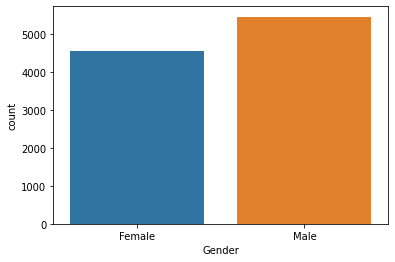

In [26]:
print(df['Gender'].value_counts())

sns.countplot(x='Gender', data = df)
plt.show()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64


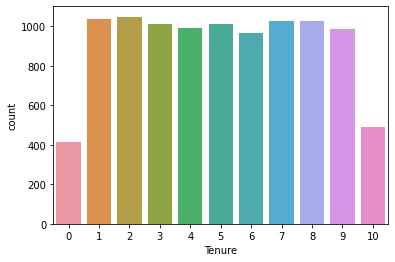

In [27]:
print(df['Tenure'].value_counts())

sns.countplot(x='Tenure', data = df)
plt.show()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


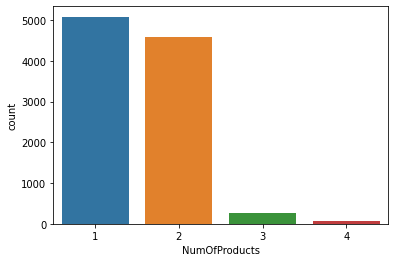

In [28]:
print(df['NumOfProducts'].value_counts())

sns.countplot(x='NumOfProducts', data = df)
plt.show()

1    7055
0    2945
Name: HasCrCard, dtype: int64


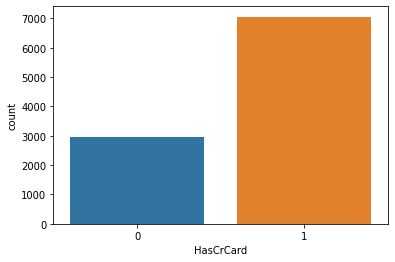

In [29]:
print(df['HasCrCard'].value_counts())

sns.countplot(x='HasCrCard', data = df)
plt.show()

# Finding Relations

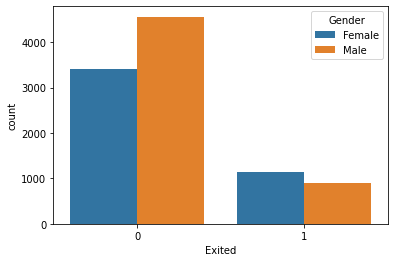

In [31]:
sns.countplot(x='Exited', data = df, hue= 'Gender')
plt.show()

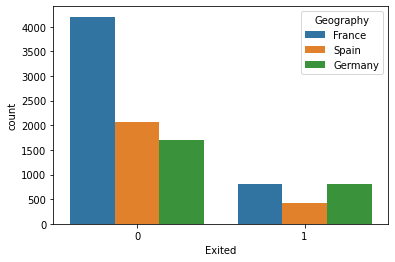

In [32]:
sns.countplot(x='Exited', data = df, hue= 'Geography')
plt.show()

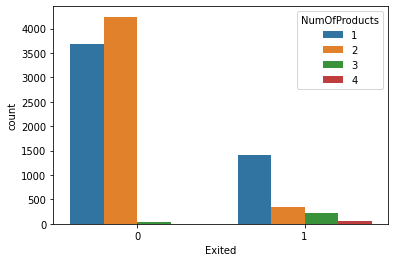

In [33]:
sns.countplot(x='Exited', data = df, hue= 'NumOfProducts')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


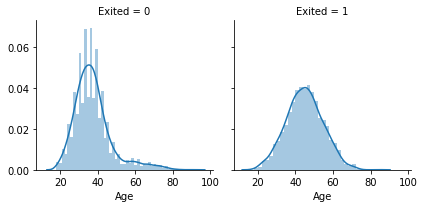

In [35]:
sns.FacetGrid(df, col='Exited')\
    .map(sns.distplot,  "Age")

plt.show()

# Data Preprocessing

In [36]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
df.drop(columns=['RowNumber', "CustomerId", "Surname"], inplace=True)

In [38]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
df['Geography'] = df['Geography'].astype('category').cat.codes

In [43]:
df['Gender'] = np.where(df['Gender']=='Male', 1, 0)

In [44]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [46]:
X = df.drop(columns = ['Exited']).values
y = df['Exited'].values

In [49]:
X.shape

(10000, 10)

In [50]:
y.shape

(10000,)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model Building

<img src="https://media.giphy.com/media/2tLAG0VeW2DqgeSzl5/giphy.gif" width=300>

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [53]:
from xgboost import XGBClassifier

In [55]:
basic_model = XGBClassifier()
basic_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [57]:
def evaluate_model(model):
    print("Training accuracy:", model.score(X_train, y_train))
    print("Testing accuracy:", model.score(X_test, y_test))

    y_pred = model.predict(X_test)

    print(confusion_matrix(y_test, y_pred))

    print(classification_report(y_test, y_pred))

    print("F1 score:", f1_score(y_test, y_pred))

In [58]:
evaluate_model(basic_model)

Training accuracy: 0.8652238805970149
Testing accuracy: 0.8681818181818182
[[2572   85]
 [ 350  293]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2657
           1       0.78      0.46      0.57       643

    accuracy                           0.87      3300
   macro avg       0.83      0.71      0.75      3300
weighted avg       0.86      0.87      0.85      3300

F1 score: 0.5739471106758081


# Hyperparameter Tuning

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
xgb_params = {
    'n_estimators' : [100, 200],
    'max_depth' : [4,5]
}

In [61]:
grid = GridSearchCV(XGBClassifier(), param_grid=xgb_params, scoring='accuracy', cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 5], 'n_estimators': [100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='acc

In [62]:
print("Best score", grid.best_score_)

Best score 0.8586567164179104


In [63]:
print("Best score", grid.best_params_)

Best score {'max_depth': 4, 'n_estimators': 100}


In [64]:
model_1 = XGBClassifier(max_depth=4)
model_1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [65]:
evaluate_model(model_1)

Training accuracy: 0.876268656716418
Testing accuracy: 0.8718181818181818
[[2566   91]
 [ 332  311]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.92      2657
           1       0.77      0.48      0.60       643

    accuracy                           0.87      3300
   macro avg       0.83      0.72      0.76      3300
weighted avg       0.86      0.87      0.86      3300

F1 score: 0.5952153110047846


In [66]:
350+85

435

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
model_2 = GradientBoostingClassifier(n_estimators=500)
model_2.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [69]:
evaluate_model(model_2)

Training accuracy: 0.9073134328358209
Testing accuracy: 0.8696969696969697
[[2546  111]
 [ 319  324]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2657
           1       0.74      0.50      0.60       643

    accuracy                           0.87      3300
   macro avg       0.82      0.73      0.76      3300
weighted avg       0.86      0.87      0.86      3300

F1 score: 0.6011131725417439
